In [314]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt

In [318]:
def clean_name(series): 
    new=[]
    for x in series:
        if x%1==0:
            new += [str(int(x))]

        else:
            new += [str(x)]
    return new

In [347]:
buyouts = pd.read_csv('buyouts.csv')
elevation = pd.read_csv('elevation.csv')
coffee = pd.read_csv('coffee_sf_filtered.csv')

buyouts['name']=clean_name(buyouts.name)
buyouts = buyouts.set_index('name')
buyouts['year'] = pd.to_datetime(buyouts['Pre Buyout Disclosure Declaration Date']).dt.year
buyouts = buyouts[buyouts['year'].notna()]
grouped = buyouts.groupby(['name','year']).size().unstack().fillna(0).iloc[:,:-2]

elevation = elevation.set_index(elevation['name.1'].apply(lambda x: x[:-1]))

coffee['name']=clean_name(coffee.NAME)
coffee = coffee.set_index('name')
coffee = coffee.groupby(coffee.index).size()

In [499]:
buyouts
buyouts['date']= buyouts['Pre Buyout Disclosure Declaration Date'].apply(lambda x: x.replace('/','-'))
long = buyouts['point'].apply(lambda x: x.replace('POINT (','').strip().replace(' ',',').replace(')','').split(',')[0])
lat = buyouts['point'].apply(lambda x: x.replace('POINT (','').strip().replace(' ',',').replace(')','').split(',')[1])
buyouts['long']=long
buyouts['lat']=lat
buyouts[['long','lat','date','Buyout Amount','Number of Tenants']]
buyouts.columns


Index(['Unnamed: 0', 'Case Number', 'Pre Buyout Disclosure Declaration Date',
       'Buyout Agreement Date', 'Buyout Amount', 'Unknown Amount',
       'Other Consideration', 'Number of Tenants', 'Address', 'ZIP Code',
       'Supervisor District', 'Analysis Neighborhood', 'point',
       'geocoding_confidence', 'SF Find Neighborhoods',
       'Current Police Districts', 'Current Supervisor Districts',
       'Analysis Neighborhoods', 'Areas of Vulnerability, 2016',
       'Central Market/Tenderloin Boundary',
       'Invest In Neighborhoods (IIN) Areas',
       'Civic Center Harm Reduction Project Boundary', 'Neighborhoods', 'poly',
       'geo_str', 'year', 'date', 'long', 'lat'],
      dtype='object')

In [348]:
pca = pd.read_csv('pca_result')
pca['name']=clean_name(pca.name)
pca = pca.set_index('name')
pca['y'] = None
pca.loc[pca[(pca['2018']-pca['2010'])>0].index,'y']=1
pca.loc[pca[(pca['2018']-pca['2010'])<0].index,'y']=0
pca = pca.dropna()

In [349]:
pca

,2010,2011,2012,2013,2014,2015,2016,2017,2018,y
name,,,,,,,,,,
101,286380.985628,340047.702884,174330.423364,42884.871786,-34944.399380,-152797.460472,-162664.523922,-243689.518542,-249548.081347,0
102,337158.426298,409680.567794,255869.222450,90471.441894,1324.803609,-201009.805142,-221498.669023,-286422.784545,-385573.203336,0
103,336431.509040,409314.018647,256093.534333,90736.852995,1622.969479,-200354.086280,-221530.600725,-286436.716785,-385877.480704,0
104,286743.042901,339929.406176,174926.242099,43033.491710,-34897.126973,-153124.565061,-163017.465315,-243573.437105,-250019.588432,0
105,219629.242399,281171.660206,85895.209232,-17394.332622,-70274.506822,-156967.563876,-99170.902626,-113929.830730,-128958.975161,0
...,...,...,...,...,...,...,...,...,...,...
610,-195626.615654,-259609.606382,-210332.766462,-93854.091346,-11348.580095,106917.858999,162937.883914,221478.277255,279437.639772,1
611,251206.185321,312578.881433,161972.090985,18170.981877,-71517.305717,-164465.184756,-115726.605292,-161155.390424,-231063.653428,0
612,-195714.213251,-259527.912944,-210387.006125,-93869.505077,-11443.302127,106809.260443,162887.075750,221622.151176,279623.452154,1


In [422]:
elevation['max elevation']
pd.to_datetime(buyouts['Pre Buyout Disclosure Declaration Date']).dt.year

name
109        2017
109        2018
109        2017
109        2017
109        2016
           ... 
604        2017
9805.01    2018
9805.01    2017
332.03     2019
9803       2018
Name: Pre Buyout Disclosure Declaration Date, Length: 4138, dtype: int64

In [444]:
data = pca.merge(elevation['max elevation'],left_index=True,right_index=True)[['y','max elevation']]
data = data.merge(grouped,left_index=True,right_index=True)
data = data.merge(coffee.rename('coffee'),left_index=True,right_index=True)

X = data.iloc[:,1:]
y = data.iloc[:,0]
y=y.astype(int)

0.6666666666666666

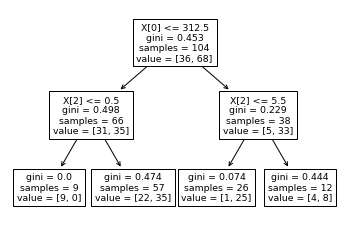

In [473]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train,y_train)
tree.plot_tree(clf) 
clf.score(X_test,y_test)

In [436]:
len(X[:20])

20

In [437]:
diff = pca['2018']-pca['2010']
data = data.merge(diff.rename('new'),left_index=True,right_index=True)

In [241]:
X[2018]

101     2.0
102     7.0
103    17.0
104     9.0
106     5.0
       ... 
610     2.0
611     1.0
612     5.0
614     4.0
615     3.0
Name: 2018, Length: 180, dtype: float64